要分析的几个问题：

1.有多少品牌各有多少商品参加了双十一活动？

2.哪些商品真的在打折？

3.商家营销套路挖掘



In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


import warnings
warnings.filterwarnings('ignore')

from bokeh.io import output_notebook
output_notebook()
# 导入notebook绘图模块

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource
# 导入图表绘制、图标展示模块
# 导入ColumnDataSource模块

Loading BokehJS ...

In [4]:
data=pd.read_excel("./data/双十一淘宝美妆数据.xlsx",index_col=0)

data.head()

,id,title,price,店名
update_time,,,,
2016-11-14,A2251521828,相宜本草四倍多萃润泽精华保湿霜滋润面霜女补水,79.0,相宜本草
2016-11-14,A2251610120,正品相宜本草四倍多萃润泽洁面膏深层清洁滋润补水保湿,29.0,相宜本草
2016-11-14,A2251615486,相宜本草红石榴亮白嫩肤水女紧致补水保湿精华爽肤水女秋冬护肤品,108.0,相宜本草
2016-11-14,A2252191048,相宜本草红石榴鲜活透亮面贴膜7片补水保湿女化妆品滋润,79.0,相宜本草
2016-11-14,A2253094636,相宜本草去死皮膏洁净面部全身温和去角质补水化妆,35.0,相宜本草


In [8]:
print('数据条数%d' %len(data))
print('日期：',data.index.unique())
data['date']=data.index.day
data.info()

数据条数27642
日期： DatetimeIndex(['2016-11-14', '2016-11-13', '2016-11-12', '2016-11-11',
               '2016-11-10', '2016-11-09', '2016-11-08', '2016-11-07',
               '2016-11-06', '2016-11-05'],
              dtype='datetime64[ns]', name='update_time', freq=None)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27642 entries, 2016-11-14 to 2016-11-05
Data columns (total 5 columns):
id       27642 non-null object
title    27642 non-null object
price    27642 non-null float64
店名       27642 non-null object
date     27642 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [7]:
data.head()

,id,title,price,店名,date
update_time,,,,,
2016-11-14,A2251521828,相宜本草四倍多萃润泽精华保湿霜滋润面霜女补水,79.0,相宜本草,14
2016-11-14,A2251610120,正品相宜本草四倍多萃润泽洁面膏深层清洁滋润补水保湿,29.0,相宜本草,14
2016-11-14,A2251615486,相宜本草红石榴亮白嫩肤水女紧致补水保湿精华爽肤水女秋冬护肤品,108.0,相宜本草,14
2016-11-14,A2252191048,相宜本草红石榴鲜活透亮面贴膜7片补水保湿女化妆品滋润,79.0,相宜本草,14
2016-11-14,A2253094636,相宜本草去死皮膏洁净面部全身温和去角质补水化妆,35.0,相宜本草,14


# 1.有多少个品牌和商品参加了双十一

销售节奏：

A 11.11前后及当天都在售的商品

B 11.11之后停止销售

C 11.11开始销售并一直在售

D 11.11开始销售并当天停止

E 11.11之前停止销售

F 11.11只有当天停止销售

G 11.12开始销售



In [23]:
# 11.05-11.14品牌和商品总数量

bands=len(data['店名'].unique())

print('品牌总共有{}个，分别是{}'.format(bands,data['店名'].unique()))

goods=len(data['id'].unique())
print('商品数量总共有{}个'.format(goods))


品牌总共有22个，分别是['相宜本草' '佰草集' '欧莱雅' '美宝莲' '玉兰油' '蜜丝佛陀' '悦诗风吟' 'SKII' '兰芝' '妮维雅' '自然堂' '倩碧'
 '欧珀莱' '美加净' '雅诗兰黛' '资生堂' '兰蔻' '雅漾' '雪花秀' '植村秀' '薇姿' '娇兰']
商品数量总共有3502个


In [30]:
# 11.11当天销售的品牌和商品

bands11=len(data[data.date==11]['店名'].unique())
print('11.11当天销售的品牌一共有{}种，分别是{}'.format(bands11,data[data.date==11]['店名'].unique()))

goods11=len(data[data.date==11]['id'].unique())
print('11.11当天销售的商品一共有{}种,占双十一前后商品总量的{:.2%}'.format(goods11,goods11/goods))



11.11当天销售的品牌一共有22种，分别是['相宜本草' '佰草集' '欧莱雅' '美宝莲' '玉兰油' '蜜丝佛陀' '悦诗风吟' 'SKII' '兰芝' '妮维雅' '自然堂' '倩碧'
 '欧珀莱' '美加净' '雅诗兰黛' '资生堂' '兰蔻' '雅漾' '雪花秀' '植村秀' '薇姿' '娇兰']
11.11当天销售的商品一共有2335种,占双十一前后商品总量的66.68%


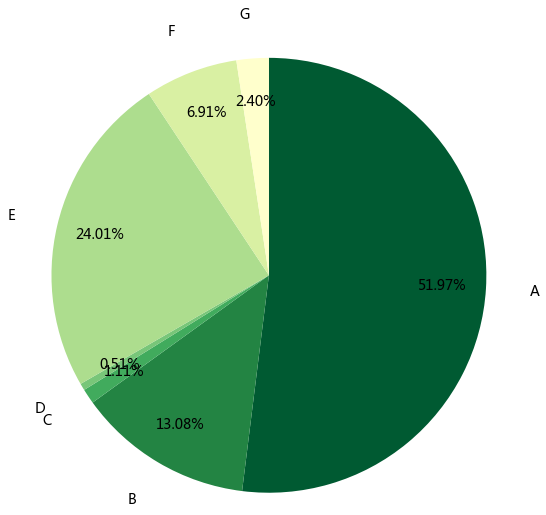

In [156]:
# 对每个商品进行分类


data1=data[['id','title','店名','date']]

# 每个商品的开售时间和截至时间
d1=data1[['id','date']].groupby('id').agg(['min','max'])['date']


# 双十一当天售卖的商品id
id11=data1[data1['date']==11]['id'].unique()
d2=pd.DataFrame({'id':id11,'双十一当天是否售卖':True})

# 合并数据
id_date=pd.merge(d1,d2,left_index=True,right_on='id',how='left')
id_date['双十一当天是否售卖'].fillna(False,inplace=True)

id_date=id_date.set_index('id',drop=False)

id_date.head()


id_date['type']='new'

id_date['type'][(id_date['min']<11)&(id_date['max']>11)&(id_date['双十一当天是否售卖'])]='A'
id_date['type'][(id_date['min']<11)&(id_date['max']==11)]='B'
id_date['type'][(id_date['min']==11)&(id_date['max']>11)]='C'
id_date['type'][(id_date['min']==11)&(id_date['max']==11)]='D'
id_date['type'][(id_date['max']<11)]='E'
id_date['type'][(id_date['min']<11)&(id_date['max']>11)&(id_date['双十一当天是否售卖']==False)]='F'
id_date['type'][(id_date['min']>11)]='G'

# print('没有参与双十一的商品：\n',id_date[id_date.type=='new'])
id_date.head(20)


result=id_date['type'].value_counts()
# 重新排序
result=result.loc[['A','B','C','D','E','F','G',]]
# result.reindex(['A','B','C','D','E','F','G'])

from bokeh.palettes import brewer
colori = brewer['YlGn'][7]


plt.axis('equal')
temp=plt.pie(result,radius=2.5,startangle=90,colors=colori,labels=result.index,autopct='%.2f%%',
        pctdistance=0.8,labeldistance=1.2,counterclock=False,textprops={'fontsize':14})



In [188]:


id_not11=id_date[id_date['双十一当天是否售卖']==False]
print('双十一当天没有参加活动的商品总数{}个，占比为{:.2%}'.format(len(id_not11),len(id_not11)/goods))
print('没参加双十一活动的商品销售节奏有{}'.format(id_not11.type.unique()))

# E 11.11之前停止销售
# F 11.11只有当天停止销售
# G 11.12开始销售

# 暂时下架（F），预售(E部分数据)，双十一前换脸（E部分数据），彻底下架（E部分数据），没有参加双十一（G）

id_con1=id_date['id'][id_date.type=='F'].values
id_con2=id_date['id'][id_date.type=='G'].values


df_not11=id_not11[['id','type']]
data_not11=pd.merge(df_not11,data,on='id',how='left')

# 预售
data_con3=data_not11[data_not11['title'].str.contains('预售')]
id_con3=data_con3['id'].unique()

# 换脸
data_con4=data_not11[['id','title','date']].groupby(['id','title']).count()

id_counts=data_con4.reset_index()['id'].value_counts()
id_con4=id_counts[id_counts>1].index

E_ids=id_date['id'][id_date.type=='E'].values

print("未参与双十一当天活动的商品中：\n暂时下架商品的数量为%i个，换脸商品的数据量为%i个，预售商品的数据量为%i个" 
      % (len(id_con1), len(id_con4), len(id_con3)))


双十一当天没有参加活动的商品总数1167个，占比为33.32%
没参加双十一活动的商品销售节奏有['E' 'F' 'G']
未参与双十一当天活动的商品中：
暂时下架商品的数量为242个，换脸商品的数据量为110个，预售商品的数据量为453个


In [219]:
# 真正参与双十一活动的品牌有哪些？其各个品牌参与双十一活动的商品数量分布是怎样的？
# 真正参加活动的商品 = 双十一当天在售的商品 + 预售商品(虽然可能双十一当天没有销售，但也做了降价)


result_id=pd.DataFrame({'id':np.unique(np.hstack((id11,id_con3)))})

print('真正参加双十一活动的商品商品总数为{}个，占比为{:.2%}'.format(len(result_id),len(result_id)/goods))


# 真正参加的双十一的店铺
x1=pd.DataFrame({'id':id11})
brand_11sale=pd.merge(x1,data,on='id',how='left').groupby('店名')['id'].count()


# 每家店铺的预售商品数量
x2=pd.DataFrame({'id':id_con3})
brand_ys=pd.merge(x2,data,on='id',how='left').groupby('店名')['id'].count()

result_data=pd.DataFrame({'当天参加活动的商品数量':brand_11sale,'预售的商品数量':brand_ys})
result_data['参与双十一活动商品总数'] = result_data['当天参加活动的商品数量'] + result_data['预售的商品数量']
result_data.sort_values(by='参与双十一活动商品总数',inplace=True,ascending=False)
result_data

真正参加双十一活动的商品商品总数为2788个，占比为79.61%


,当天参加活动的商品数量,预售的商品数量,参与双十一活动商品总数
店名,,,
悦诗风吟,2709,60,2769
佰草集,1840,182,2022
欧莱雅,1644,115,1759
雅诗兰黛,1392,239,1631
倩碧,1304,299,1603
妮维雅,1189,78,1267
美加净,1217,6,1223
娇兰,805,365,1170
兰蔻,917,202,1119


In [217]:
# 制作堆叠图查看各个品牌参与双十一活动的商品数量分布

from bokeh.models import HoverTool
from bokeh.core.properties import value
# 导入相关模块

lst_brand = result_data.index.tolist()
lst_type = result_data.columns.tolist()[:2]
colors = ["#718dbf" ,"#e84d60"]
# 设置好参数

result_data.index.name = 'brand'
result_data.columns = ['sale_on_11','presell','sum']
# 修改数据index和columns名字为英文

source = ColumnDataSource(data=result_data)
# 创建数据

 # 设置hover标签显示内容
hover = HoverTool(tooltips=[("品牌", "@brand"),
                            ("双十一当天参与活动的商品数量", "@sale_on_11"),
                            ("预售商品数量", "@presell"),
                            ("参与双十一活动商品总数", "@sum")
                           ]) 

# 构建绘图空间
p = figure(x_range=lst_brand, plot_width=900, plot_height=350, title="各个品牌参与双十一活动的商品数量分布",
          tools=[hover,'reset,xwheel_zoom,pan,crosshair'])


p.vbar_stack(lst_type,          # 设置堆叠值
             x='brand',     # 设置x坐标
             source=source,
             width=0.9, color=colors, alpha = 0.8,legend=[value(x) for x in lst_type],
             muted_color='black', muted_alpha=0.2
             )
# 绘制堆叠图

p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "horizontal"
p.legend.click_policy="mute"
# 设置其他参数

show(p)


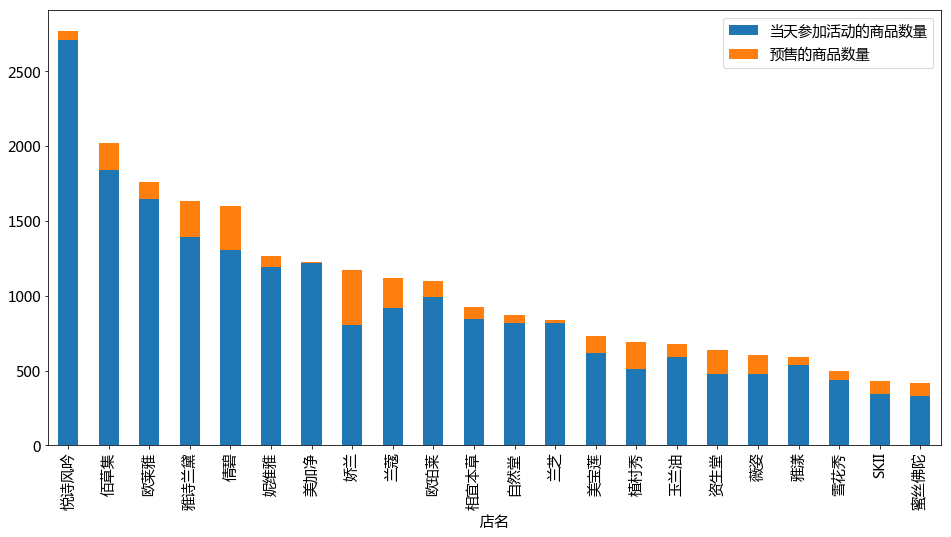

In [231]:
new_data=result_data[['当天参加活动的商品数量','预售的商品数量']]


# new_data.plot.barh(stacked=True,figsize=(8,10))
new_data.plot(kind='bar',stacked=True,figsize=(16,8))

# 2.哪些商品真的在打折？

要求：

① 针对每个商品，评估其打折的情况

② 针对在打折的商品，其折扣率是多少

   用bokeh绘制折线图：x轴为折扣率，y轴为商品数量
   
③ 按照品牌分析，不同品牌的打折力度

   用bokeh绘制浮动散点图，y坐标为品牌类型，x坐标为折扣力度
   
提示：

① 打折情况评估方法：

   真打折：商品的价格在10天内有波动、双11价格为10天内最低价、不存在涨价现象
   
   不打折：商品价格无变化
   
② 针对每个商品做price字段的value值统计，查看价格是否有波动，可以先用pd.cut将date分为不同周期：'双十一前','双十一当天','双十一后'，得到period字段

   data[['id','price','date']].groupby(['id','price']).min()
   
   针对统计出来的结果，如果按照id和price分组仍只有一个唯一值，则说明价格未变，没打折；否则为打折
   
③ 折扣率 = 双十一当天价格 / 双十一之前价格

④ 作图过程中，清除掉折扣率大于95%的数据


In [257]:
# 打折评估方法：
# 真打折：商品的价格在10天内有波动、双11价格为10天内最低价、不存在涨价现象
# 不打折：商品价格无变化

data2=data

# 分组
data2['period']=pd.cut(data2['date'],bins=[4,10,11,14],labels=['双十一前','双十一当天','双十一后'])


price=data2[['id','price','period']].groupby(['id','price']).min()  # min的作用不是计算，因为period无法计算，只为了能显示
# price.loc['A42152794843',:]   # 多层索引的访问
price=price.reset_index()

price_count=price['id'].value_counts()

# 获取价格变化、不变的商品id
id_type1=price_count[price_count==1].index
id_type2=price_count[price_count!=1].index

n1 = len(id_type1)
n2 = len(id_type2)
print('真打折的商品数量约占比{:.2%}，不打折的商品数量约占比{:.2%}'.
      format(n2/len(price_count), n1/len(price_count)))



真打折的商品数量约占比24.73%，不打折的商品数量约占比75.27%


In [269]:
# 针对在打折的商品，其折扣率是多少

 
result3=data2[['id','period','price','店名']].groupby(['id','period']).min()
result3=result3.reset_index()

before11=result3[result3['period']=='双十一前']
after11=result3[result3['period']=='双十一当天']

result3_data=pd.merge(before11,after11,on='id').dropna()

result3_data['折扣率']=result3_data['price_y']/result3_data['price_x']

result3_data.sort_values(by='折扣率',ascending=True)

,id,period_x,price_x,店名_x,period_y,price_y,店名_y,折扣率
3387,A541444436231,双十一前,999.0,欧莱雅,双十一当天,99.00,欧莱雅,0.099099
3394,A541463782134,双十一前,999.0,欧莱雅,双十一当天,129.00,欧莱雅,0.129129
3390,A541455153440,双十一前,999.0,欧莱雅,双十一当天,142.00,欧莱雅,0.142142
3398,A541469323459,双十一前,999.0,欧莱雅,双十一当天,145.00,欧莱雅,0.145145
3152,A540139726734,双十一前,999.0,美宝莲,双十一当天,149.00,美宝莲,0.149149
3388,A541444460738,双十一前,999.0,欧莱雅,双十一当天,168.00,欧莱雅,0.168168
3149,A540084337255,双十一前,580.0,佰草集,双十一当天,99.00,佰草集,0.170690
3397,A541468109577,双十一前,530.0,兰芝,双十一当天,100.00,兰芝,0.188679
2770,A538167073426,双十一前,265.0,兰芝,双十一当天,50.00,兰芝,0.188679
3151,A540139054319,双十一前,999.0,美宝莲,双十一当天,189.00,美宝莲,0.189189


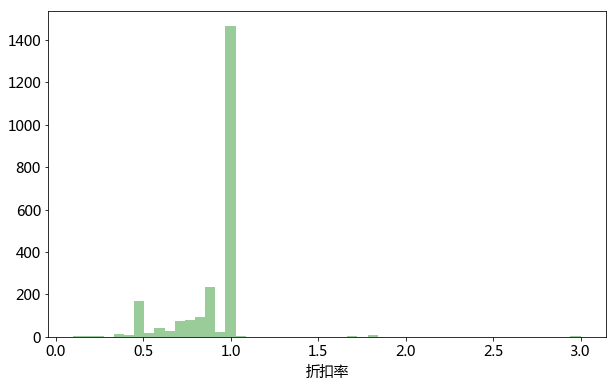

In [280]:
# 所有商品的折扣率
fig=plt.figure(figsize=(10,6))
sns.distplot(result3_data['折扣率'],bins=50,color='G',kde=False)


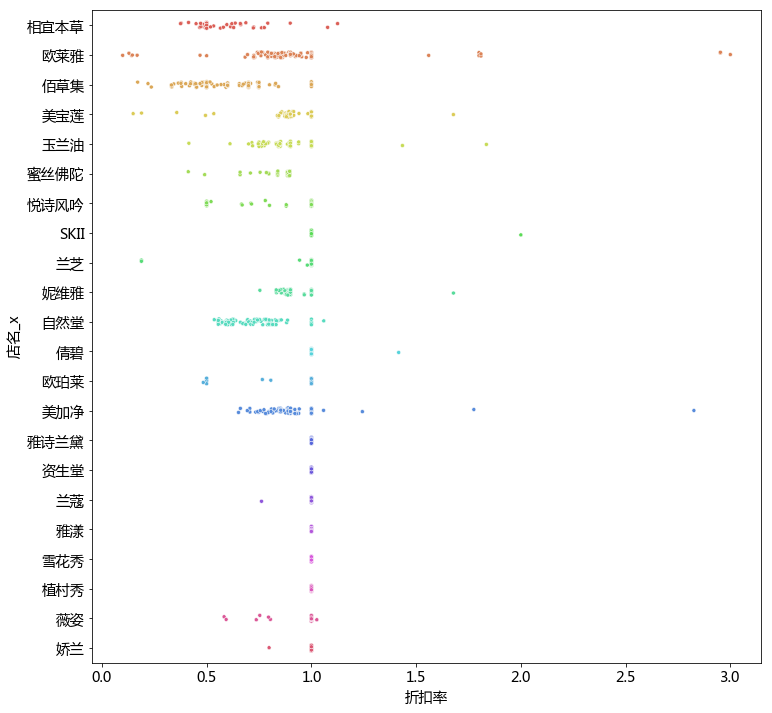

In [328]:
# 每个品牌的折扣率

result=result3_data[['店名_x','折扣率']]
fig=plt.figure(figsize=(12,12))
sns.stripplot(data=result,y='店名_x',x='折扣率',jitter=1.0,size=4,
              marker='o',edgecolor='w',linewidth=0.5,palette='hls')


# 3.商家营销套路挖掘

要求：

① 解析出不同品牌的参与打折商品比例及折扣力度，并做散点图，总结打折套路

   用bokeh绘制散点图，x轴为参与打折商品比例，y轴为折扣力度，点的大小代表该品牌参加双11活动的商品总数
   
提示：

① 折扣力度为该品牌所有打折商品的折扣均值，这里去掉品牌中不打折的数据

② 绘制散点图后，可以将x、y轴绘制均值辅助线，将绘图空间分为四个象限，基于该象限来总结套路


In [345]:
data_zk=result[result['折扣率']<0.95]
result_brand_zk=data_zk.groupby(by='店名_x').mean().reset_index()


zk_num=data_zk['店名_x'].value_counts()
all_num=result['店名_x'].value_counts()

zkbl=pd.DataFrame({'打折商品数':zk_num,'商品总数':all_num})
zkbl['参与打折商品比例']=zkbl['打折商品数']/zkbl['商品总数']
zkbl=zkbl.dropna()


result4=pd.merge(result_brand_zk,zkbl,left_on='店名_x',right_index=True,how='inner')
result4

,店名_x,折扣率,打折商品数,商品总数,参与打折商品比例
0,佰草集,0.576060,186.0,192,0.968750
1,兰芝,0.440332,3.0,97,0.030928
2,兰蔻,0.761905,1.0,104,0.009615
3,妮维雅,0.888144,90.0,127,0.708661
4,娇兰,0.798122,1.0,88,0.011364
5,悦诗风吟,0.624859,17.0,282,0.060284
6,欧珀莱,0.569535,8.0,113,0.070796
7,欧莱雅,0.772428,74.0,180,0.411111
8,玉兰油,0.813539,41.0,64,0.640625
9,相宜本草,0.528362,90.0,92,0.978261


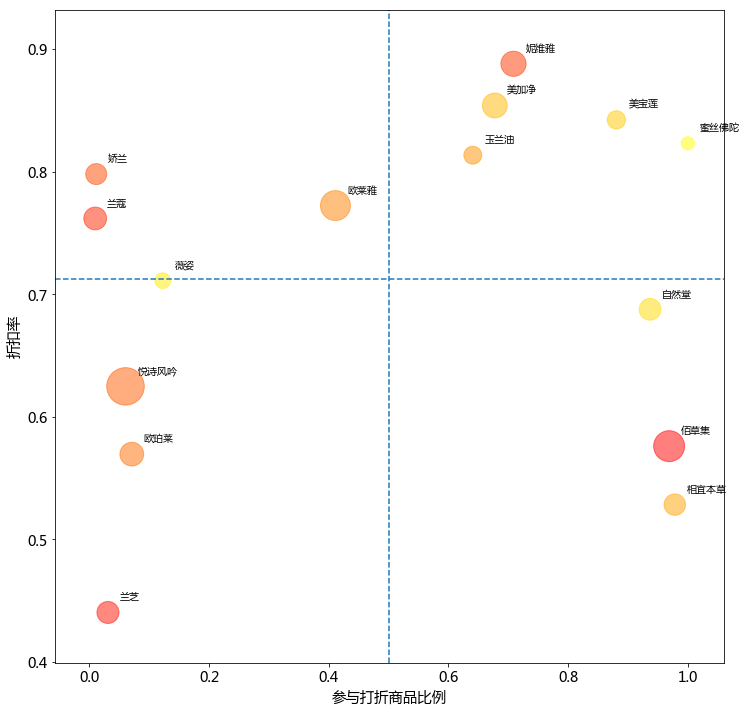

In [390]:
result=result4

# sns.jointplot(kind='scatter',x='参与打折商品比例',y='折扣率',data=result)
fig=plt.figure(figsize=(12,12))
plt.scatter(x=result['参与打折商品比例'],y=result['折扣率'],alpha=0.5,
            s=result['商品总数']*5,c=np.arange(len(result['店名_x'])),cmap='autumn')

plt.axvline(result['参与打折商品比例'].mean(),linestyle='--')
plt.axhline(result['折扣率'].mean(),linestyle='--')

for x,y,c in zip(result['参与打折商品比例'],result['折扣率'],result['店名_x']):
    plt.text(x+0.02,y+0.01,c)

plt.xlabel('参与打折商品比例')
plt.ylabel('折扣率')
plt.savefig('1.jpg')